In [1]:
#Nondimensionalization:

# download modsim.py if necessary
from os.path import basename, exists
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [3]:
# import functions from modsim
from modsim import *

In [4]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap11.py')

In [5]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap12.py')

Downloaded chap12.py


In [6]:
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'chap13.py')

Downloaded chap13.py


In [7]:
# import code from previous notebooks

from chap11 import make_system
from chap11 import update_func
from chap11 import run_simulation
from chap11 import plot_results

from chap12 import calc_total_infected

from chap13 import sweep_beta
from chap13 import sweep_parameters

In [9]:
#Exploring the Results:
beta_array = [0.1, 0.2, 0.3, 0.4, 0.5, 
              0.6, 0.7, 0.8, 0.9, 1.0 , 1.1]
gamma_array = [0.2, 0.4, 0.6, 0.8]
frame = sweep_parameters(beta_array, gamma_array)

In [10]:
frame.head()

,0.2,0.4,0.6,0.8
Parameter,,,,
0.1,0.010756,0.003642,0.002191,0.001567
0.2,0.118984,0.010763,0.005447,0.003644
0.3,0.589095,0.030185,0.010771,0.006526
0.4,0.801339,0.131563,0.020917,0.010780
0.5,0.896577,0.396409,0.046140,0.017640


In [11]:
for gamma in frame.columns:
    column = frame[gamma]
    for beta in column.index:
        metric = column[beta]
        print(beta, gamma, metric)

0.1 0.2 0.010756340768063644
0.2 0.2 0.11898421353185373
0.3 0.2 0.5890954199973404
0.4 0.2 0.8013385277185551
0.5 0.2 0.8965769637207062
0.6 0.2 0.942929291399791
0.7 0.2 0.966299311298026
0.8 0.2 0.9781518959989762
0.9 0.2 0.9840568957948106
1.0 0.2 0.9868823507202488
1.1 0.2 0.988148177093735
0.1 0.4 0.0036416926514175607
0.2 0.4 0.010763463373360094
0.3 0.4 0.030184952469116566
0.4 0.4 0.131562924303259
0.5 0.4 0.3964094037932606
0.6 0.4 0.5979016626615987
0.7 0.4 0.7284704154876106
0.8 0.4 0.8144604459153759
0.9 0.4 0.8722697237137128
1.0 0.4 0.9116692168795855
1.1 0.4 0.9386802509510287
0.1 0.6 0.002190722188881611
0.2 0.6 0.005446688837466351
0.3 0.6 0.010771139974975585
0.4 0.6 0.020916599304195316
0.5 0.6 0.04614035896610047
0.6 0.6 0.13288938996079536
0.7 0.6 0.3118432512847451
0.8 0.6 0.47832565854255393
0.9 0.6 0.605687582114665
1.0 0.6 0.7014254793376209
1.1 0.6 0.7738176405451065
0.1 0.8 0.0015665254038139675
0.2 0.8 0.003643953969662994
0.3 0.8 0.006526163529085194
0.4 0

In [12]:
from matplotlib.pyplot import plot

def plot_sweep_frame(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            metric = column[beta]
            plot(beta/gamma, metric, '.', color='C1')

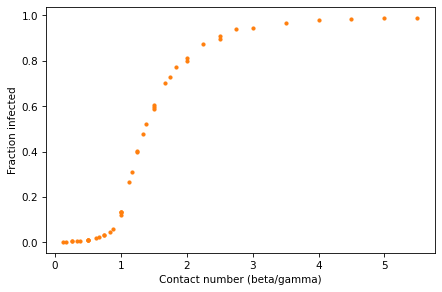

In [13]:
plot_sweep_frame(frame)

decorate(xlabel='Contact number (beta/gamma)',
         ylabel='Fraction infected')

In [15]:
#Analysis and Simulation:
s_inf_array = linspace(0.003, 0.99, 50)

In [16]:
from numpy import log
c_array = log(s_inf_array) / (s_inf_array - 1)

In [17]:
frac_infected = 1 - s_inf_array

In [18]:
frac_infected_series = make_series(c_array, frac_infected)

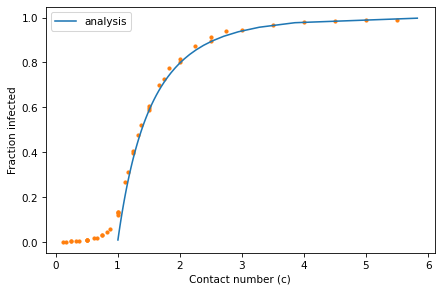

In [19]:
plot_sweep_frame(frame)
frac_infected_series.plot(label='analysis')

decorate(xlabel='Contact number (c)',
         ylabel='Fraction infected')

In [20]:
#Exercise1: what happens if we do the same thing using the difference instead of the ratio?
# Model with difference between beta and gamma
def plot_sweep_frame_difference(frame):
    for gamma in frame.columns:
        column = frame[gamma]
        for beta in column.index:
            frac_infected = column[beta]
            plot(beta - gamma, frac_infected, 'ro')

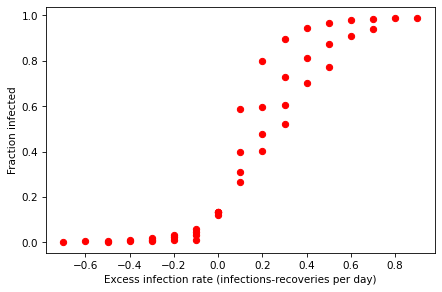

In [23]:
# Plotting the results
plot_sweep_frame_difference(frame)
decorate(xlabel='Excess infection rate (infections-recoveries per day)',
         ylabel='Fraction infected')

In [22]:
# The results don't exactly fall on a line after infection rate of 0.15, which means that if we know the difference between `beta` and `gamma`
# but not their ratio, that's not enough to predict the fraction infected.

In [59]:
#Exercise 2: Suppose you run a survey at the end of the semester and find that 26% of students had the Freshman Plague at some point.
import pandas as pd
import numpy as np
import os
frac_infected_series.iloc[30:80]

index
1.270022    0.392714
1.251104    0.372571
1.232948    0.352429
1.215505    0.332286
1.198727    0.312143
1.182573    0.292000
1.167003    0.271857
1.151982    0.251714
1.137479    0.231571
1.123464    0.211429
1.109908    0.191286
1.096788    0.171143
1.084080    0.151000
1.071762    0.130857
1.059815    0.110714
1.048220    0.090571
1.036960    0.070429
1.026019    0.050286
1.015381    0.030143
1.005034    0.010000
Name: values, dtype: float64

In [ ]:
#The fraction infected is 0.26 when the contact number is about 1.159 [(1.151 of 0.25 +1.167 of 0.27)/2]